# Higher Order ODEs

So far we have only applied ODE solving techniques to first order ODEs, but it's not too hard to apply them to second and higher order problems.

$\large \frac{d^2y}{dx^2} = f(x,y,\frac{dy}{dx})$

Let's say you want to solve such an ODE over the domain $[a,b]$. For an initial value problem you need the value of $y$ and $\frac{dy}{dx}$ at the first point in the domain, $a$.

$\large y(a) = A~~~$ and $~~~\large \frac{dy}{dx}\rvert_{x=a} = B$

What we do now is transform the 2nd order ODE into two first order ODEs as follows:

First define, $w$

$\large w = \frac{dy}{dx}$

So that now the original equation can be written as:

$\large \frac{dw}{dx} = \frac{d^2y}{dx^2}$


Now the IVP us transformed to solving the two following ODEs:


$\large \frac{dy}{dx} = w~~~~~~y(a) = A$

$\large \frac{dw}{dx} = f(x,y,w)~~~~~w(a)=B$

Now we can solve these two ODEs simultaneously using any of the techniques we have used before: Heun's method, RK, etc...





## Project Prep

The project will involve modeling a certain system that serves as a model for many real applications - a spring-mass-damper system. To start with we will model the non-forced (i.e. $F=0$) as shown below:

![image info](./ode_ivp-master/spring_mass_damper.png)

The governing equation for determining the x versus time is: 

$\large \frac{d^2x}{dt^2} + 2 b \frac{dx}{dt} + k^2 x = F(t)$

Here, $k$ is the spring constant, and $b$ is the damping factor.

For now take the values above as follows:

$k^2 = 48 \frac{N}{m・kg}$

$b = 0.7 s^{-1}$

$x(0) = 0$

$\frac{dx}{dt}\rvert_{t=0} = 0.2 \frac{m}{s}$

$0 <= t <= 5 s$

$F(t) = 0$

### Assignment
By Wednesday Dec. 1, solve the 2nd order ODE above using RK3 for the specified values.



In [1]:
%matplotlib inline
from math import *
from numpy import *
from matplotlib import *
import sympy

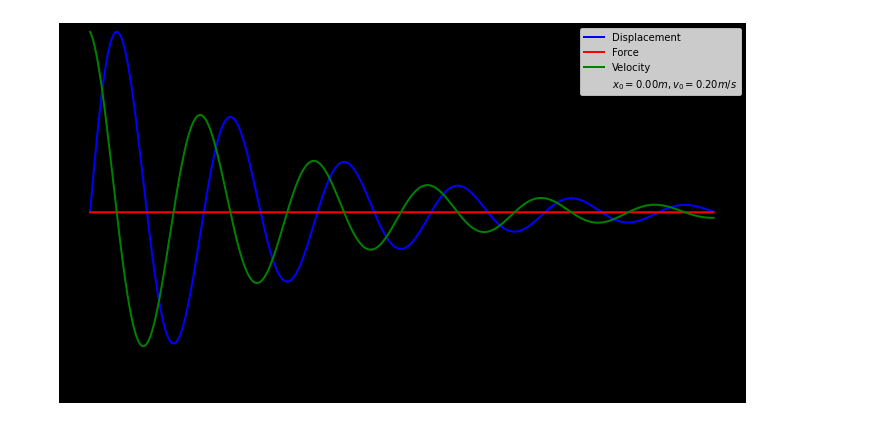

In [2]:
def spring_mass_damper(steps, t, x0, v0, m, b, k, f):
    #initalize position and velocity vectors
    x = zeros(steps)
    v = zeros(steps)
    x[0] = x0
    v[0] = v0
    h = t[1] - t[0]
    
    #define system differential equation
    def system(X, V, F):
        return F - 2*b*V - pow(k,2)*X
    
    #Runge-Kutta 4th Order Classical Method Constants
    c1  =  1/6
    c2  =  2/6
    c3  =  2/6
    c4  =  1/6

    a2  =  1/2
    b21 =  1/2
    
    a3  =  1/2
    b31 =  0
    b32 =  1/2
    
    a4  =  1
    b41 =  0
    b42 =  0
    b43 =  1
    
    #run Runge-Kutta 4th Order Classical Method
    for i in range (0, steps - 1):
        x1 = x[i]
        v1 = v[i]
        a1 = system(x1, v1, f[i])
        
        x2 = x[i] + (b21*v1)*h
        v2 = v[i] + (b21*a1)*h
        a2 = system(x2, v2, f[i])
        
        x3 = x[i] + (b31*v2 + b32*v2)*h
        v3 = v[i] + (b31*a2 + b32*a2)*h
        a3 = system(x3, v3, f[i])
        
        x4 = x[i] + (b41*v3 + b42*v3 + b43*v3)*h
        v4 = v[i] + (b41*a3 + b42*a3 + b43*a3)*h
        a4 = system(x4, v4, f[i])
        
        x[i + 1] = x[i] + (c1*v1 + c2*v2 + c3*v3 + c4*v4)*h
        v[i + 1] = v[i] + (c1*a1 + c2*a2 + c3*a3 + c4*a4)*h
    return [x, v]
#def spring_mass_damper(steps, t, x0, v0, m, b, k, f)

#study region
ti = 0 #s
tf = 5 #s
dt = 0.001 #s
steps = int((tf - ti)/dt + 1)

#initialize time and forces
t = linspace(ti, tf, steps)
f = zeros(steps)
for i in range(0, steps):
    f[i] = 0#sin(t[i]) #N

#system properties
m = 1 #kg
b = 0.7 #s^-1
k = sqrt(48) # N/m・kg

#initial system state
x0 = 0 #m
v0 = 0.2 #m/s

#simulate the system
[x, v] = spring_mass_damper(steps, t, x0, v0, m, b, k, f)
    
#plot results
#pyplot.figure(figsize=(6,6))
fig, left1 = pyplot.subplots(constrained_layout = True,figsize=(12,6))
left1.set_facecolor("k")
left1.tick_params(colors='w')
for i in range(1, steps):
    if x[i-1] != x[i]:
        left1.set_ylim(-max(abs(x)*1.05), max(abs(x)*1.05))
        break
left1.set_xlabel(f"t (s)",color='w')
left1.set_ylabel(f"X (m)",color='w')

right1 = left1.twinx()
right1.tick_params(colors='w')
for i in range(1, steps):
    if f[i-1] != f[i]:
        right1.set_ylim(-max(abs(f)*1.05), max(abs(f)*1.05))
        break
right1.set_ylabel(f"F (N)",color='w')

right2 = left1.twinx()
right2.tick_params(axis='y', right=False, labelright=False)
right3 = right2.secondary_yaxis(1.1, color='w')
for i in range(1, steps):
    if v[i-1] != v[i]:
        right2.set_ylim(-max(abs(v)*1.05), max(abs(v)*1.05))
        break
right3.set_ylabel(f"V (m/s)",color='w')

pyplot.title(f"Runge-Kutta 3rd Order Solution of Spring-Mass-Damper System",color="w")
left1.plot(t, x, color="b", linewidth="2.0")
right1.plot(t, f, color="r", linewidth="2.0")
right2.plot(t, v, color="g", linewidth="2.0")
right2.plot(t[0], x[0], linewidth="0.0")
fig.legend(['Displacement','Force','Velocity',f'$x_0=${x0:.2f}$m, v_0=${v0:.2f}$m/s$'], loc=(0.665,0.783))
pyplot.show()